In [1]:
import numpy as np
import pandas as pd
import math
import os

import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import matplotlib.colors as colors
from matplotlib.ticker import MultipleLocator, FixedLocator,FormatStrFormatter

date = '7_19_2021'

In [2]:
if not os.path.isdir('/Users/colemeyer/Documents/ALMA Internship/Observational Data/'+date+'/errorplots/'):
    os.mkdir('/Users/colemeyer/Documents/ALMA Internship/Observational Data/'+date+'/errorplots/')
directory = '/Users/colemeyer/Documents/ALMA Internship/Observational Data/'+date+'/'

def distance(pt1,pt2):
    return math.sqrt((float(pt1[0])-float(pt2[0]))**2+(float(pt1[1])-float(pt2[1]))**2+(float(pt1[2])-float(pt2[2]))**2)

In [3]:
numOfObs = 0

arr = np.zeros((1,4),dtype='float')

for file in os.listdir(directory):
    if os.path.isdir(directory+file) and file[:3] == 'uid':
        posArr = np.genfromtxt(directory+file+'/AntPos.csv',delimiter=',',dtype='str',skip_header=1)
        newArr = np.zeros((np.shape(posArr)[0]-1,4),dtype='float')
        refantPos = posArr[0,15:18]
        numOfObs += 1
        
        for i in range(1,np.shape(posArr)[0]):
            newArr[i-1,0] = distance(refantPos,posArr[i,15:18])
            newArr[i-1,1] = posArr[i,3]
            newArr[i-1,2] = posArr[i,4]
            newArr[i-1,3] = posArr[i,5]
            
        arr = np.vstack((arr,newArr))
        
arr = np.abs(arr[1:,:])

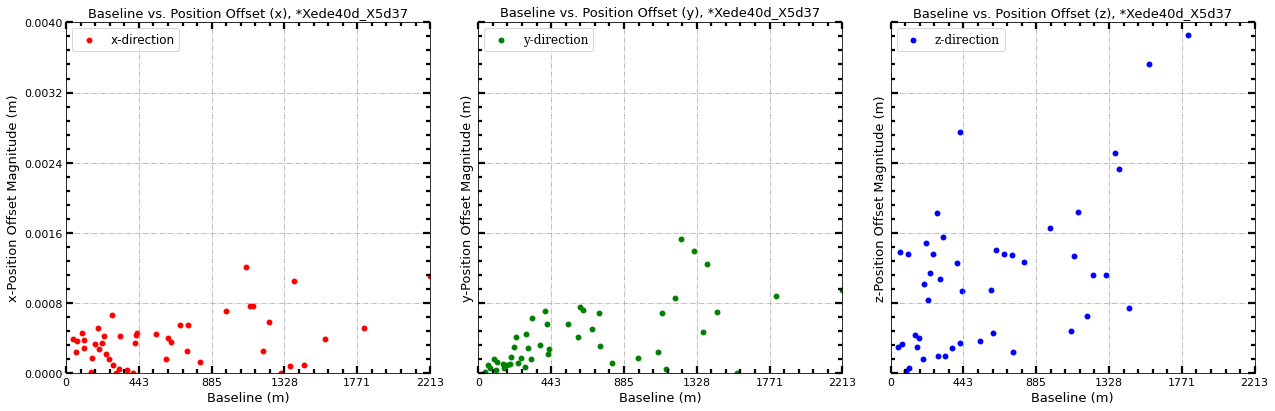

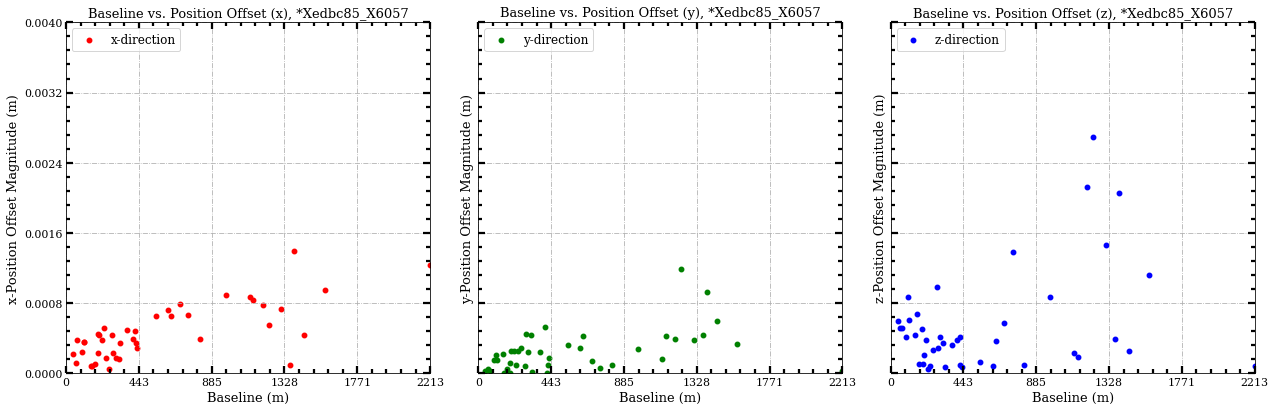

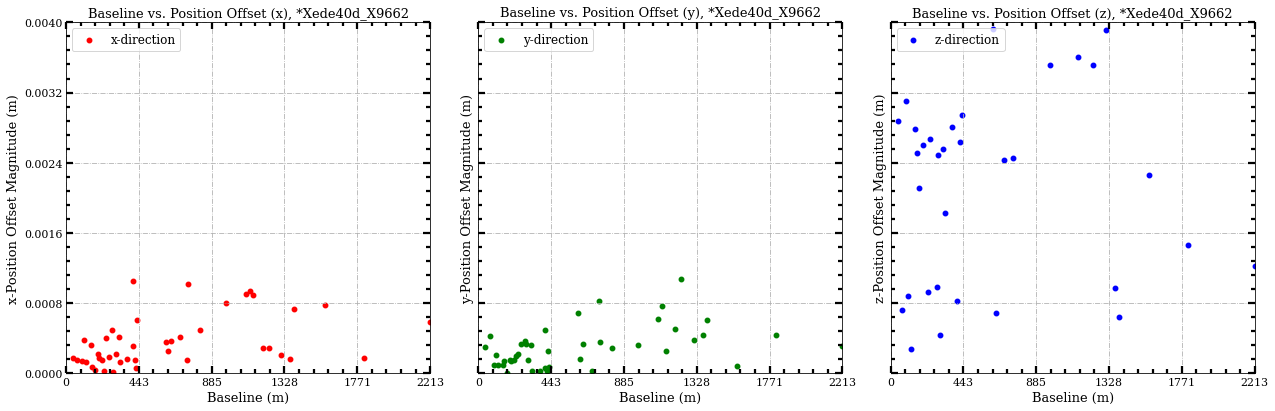

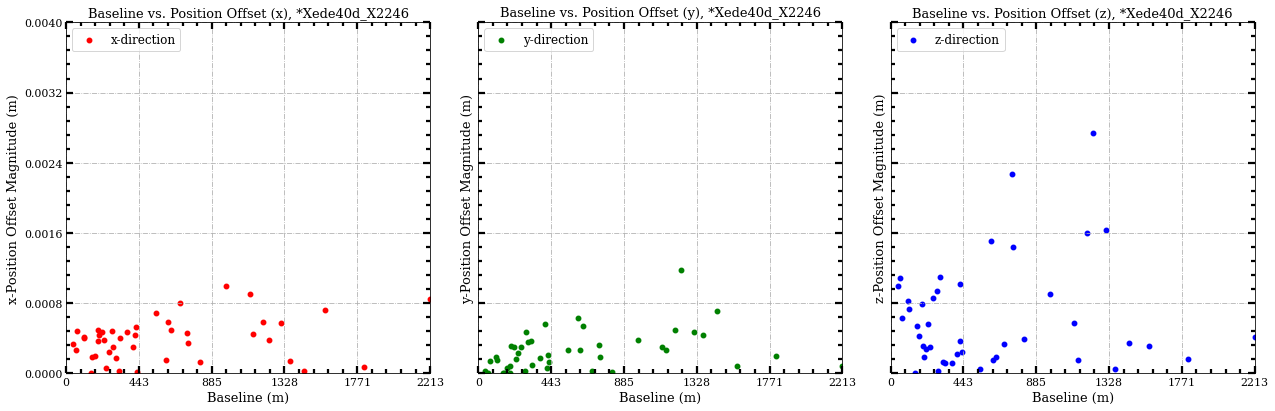

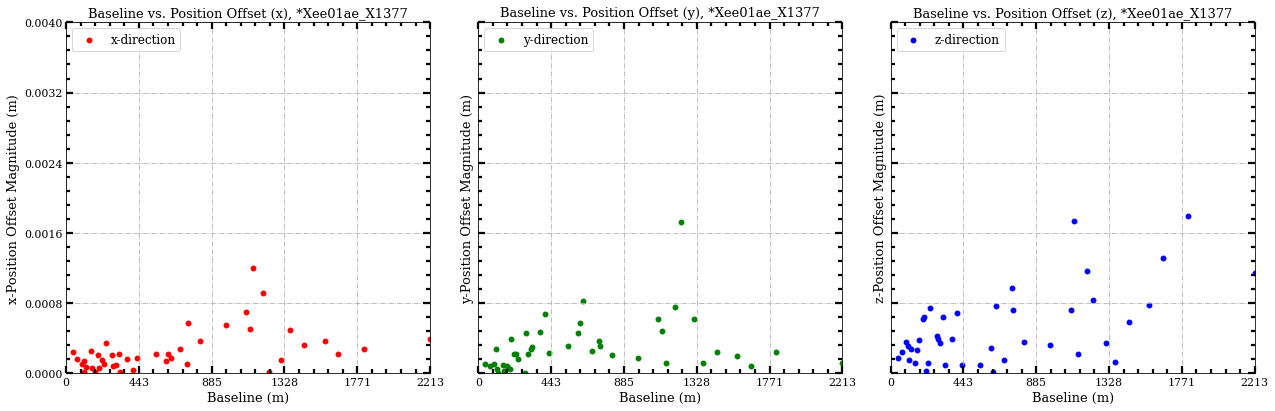

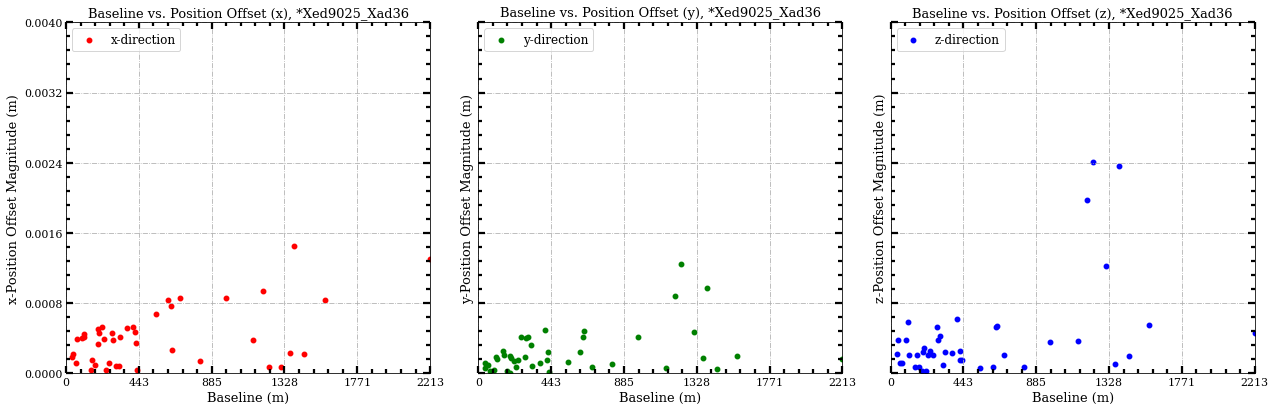

KeyboardInterrupt: 

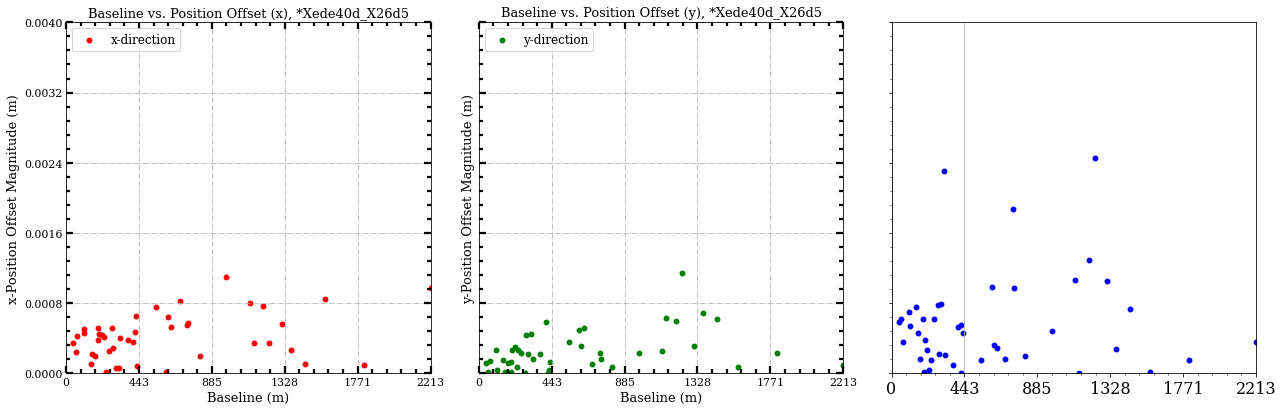

In [4]:
baselineMax = np.amax(arr[:,0])
xMax = np.amax(arr[:,1])
yMax = np.amax(arr[:,2])
zMax = np.amax(arr[:,3])

ymax = 0.004

xmin, xmax = 0,baselineMax
ymin= 0

k = 0

for file in os.listdir(directory):
    if os.path.isdir(directory+file) and file[:3] == 'uid':
        uid = file
        posArr = np.genfromtxt(directory+file+'/AntPos.csv',delimiter=',',dtype='str',skip_header=1)
        newArr = np.zeros((np.shape(posArr)[0]-1,4),dtype='float')
        refantPos = posArr[0,15:18]
        
        for i in range(1,np.shape(posArr)[0]):
            newArr[i-1,0] = distance(refantPos,posArr[i,15:18])
            newArr[i-1,1] = posArr[i,3]
            newArr[i-1,2] = posArr[i,4]
            newArr[i-1,3] = posArr[i,5]
            
        arr = np.abs(newArr[1:,:])
        
        graph = "x"
        pos = arr[:,1]
        color = 'r'

        title='Baseline vs. Position Offset (x), *'+file[11:]
        xlabel='Baseline (m)'
        ylabel=graph+'-Position Offset Magnitude (m)'

        width,height = 6,6
        xMajors,xMinors = 5,5
        yMajors,yMinors = 5,5

        fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(width*3,height),sharey=True)

        ax1.scatter(arr[:,0],pos,s=15,color=color,linestyle='-',linewidth=2,label=graph+'-direction')

        ax1.set_xlim(xmin,xmax)
        ax1.set_ylim(ymin,ymax)
        x_major_ticks = MultipleLocator((xmax - xmin) / xMajors)
        y_major_ticks = MultipleLocator((ymax - ymin) / yMajors)
        x_minor_ticks = MultipleLocator(((xmax - xmin) / xMajors) / xMinors)
        y_minor_ticks = MultipleLocator(((ymax - ymin) / yMajors) / yMinors)
        ax1.xaxis.set_major_locator(x_major_ticks)
        ax1.yaxis.set_major_locator(y_major_ticks)
        ax1.xaxis.set_minor_locator(x_minor_ticks)
        ax1.yaxis.set_minor_locator(y_minor_ticks)
        ax1.grid(True, linestyle='-.')
        ax1.tick_params(which='major',axis='both',direction='in',length=7,width=2.25,top=True,right=True,labelsize=11)
        ax1.tick_params(which='minor',axis='both',direction='in',length=4,width=2.25,top=True,right=True,labelsize=11)
        ax1.set_xlabel(xlabel,fontsize=13)
        ax1.set_ylabel(ylabel,fontsize=13)
        ax1.set_title(title,fontsize=13)
        plt.tight_layout()

        ax1.legend(loc=2,fontsize=12)
        plt.rc("font", size=16,family='serif')

        graph = "y"
        pos = arr[:,2]
        color = 'g'

        title='Baseline vs. Position Offset (y), *'+file[11:]
        xlabel='Baseline (m)'
        ylabel=graph+'-Position Offset Magnitude (m)'

        width,height = 6,6
        xMajors,xMinors = 5,5
        yMajors,yMinors = 5,5

        ax2.scatter(arr[:,0],pos,s=15,color=color,linestyle='-',linewidth=2,label=graph+'-direction')

        ax2.set_xlim(xmin,xmax)
        ax2.set_ylim(ymin,ymax)
        x_major_ticks = MultipleLocator((xmax - xmin) / xMajors)
        y_major_ticks = MultipleLocator((ymax - ymin) / yMajors)
        x_minor_ticks = MultipleLocator(((xmax - xmin) / xMajors) / xMinors)
        y_minor_ticks = MultipleLocator(((ymax - ymin) / yMajors) / yMinors)
        ax2.xaxis.set_major_locator(x_major_ticks)
        ax2.yaxis.set_major_locator(y_major_ticks)
        ax2.xaxis.set_minor_locator(x_minor_ticks)
        ax2.yaxis.set_minor_locator(y_minor_ticks)
        ax2.grid(True, linestyle='-.')
        ax2.tick_params(which='major',axis='both',direction='in',length=7,width=2.25,top=True,right=True,labelsize=11)
        ax2.tick_params(which='minor',axis='both',direction='in',length=4,width=2.25,top=True,right=True,labelsize=11)
        ax2.set_xlabel(xlabel,fontsize=13)
        ax2.set_ylabel(ylabel,fontsize=13)
        ax2.set_title(title,fontsize=13)
        plt.tight_layout()

        ax2.legend(loc=2,fontsize=12)
        plt.rc("font", size=16,family='serif')

        graph = "z"
        pos = arr[:,3]
        color = 'b'

        title='Baseline vs. Position Offset (z), *'+file[11:]
        xlabel='Baseline (m)'
        ylabel=graph+'-Position Offset Magnitude (m)'

        width,height = 6,6
        xMajors,xMinors = 5,5
        yMajors,yMinors = 5,5

        ax3.scatter(arr[:,0],pos,s=15,color=color,linestyle='-',linewidth=2,label=graph+'-direction')

        ax3.set_xlim(xmin,xmax)
        ax3.set_ylim(ymin,ymax)
        x_major_ticks = MultipleLocator((xmax - xmin) / xMajors)
        y_major_ticks = MultipleLocator((ymax - ymin) / yMajors)
        x_minor_ticks = MultipleLocator(((xmax - xmin) / xMajors) / xMinors)
        y_minor_ticks = MultipleLocator(((ymax - ymin) / yMajors) / yMinors)
        ax3.xaxis.set_major_locator(x_major_ticks)
        ax3.yaxis.set_major_locator(y_major_ticks)
        ax3.xaxis.set_minor_locator(x_minor_ticks)
        ax3.yaxis.set_minor_locator(y_minor_ticks)
        ax3.grid(True, linestyle='-.')
        ax3.tick_params(which='major',axis='both',direction='in',length=7,width=2.25,top=True,right=True,labelsize=11)
        ax3.tick_params(which='minor',axis='both',direction='in',length=4,width=2.25,top=True,right=True,labelsize=11)
        ax3.set_xlabel(xlabel,fontsize=13)
        ax3.set_ylabel(ylabel,fontsize=13)
        ax3.set_title(title,fontsize=13)

        ax3.legend(loc=2,fontsize=12)
        plt.rc("font", size=16,family='serif')

        plt.tight_layout()

        plt.show()
        #plt.savefig(directory+'errorplots/baseline_offset'+str(k)+'.png', bbox_inches='tight')
        #plt.close()
        
        k += 1